# N-gram model (bigram and trigram)

This n-gram model was built by bigram model and trigram model.

# import necessary libraries

`bigrams`, `trigrams` are used for creating models. `defaultdict` is for creating a nested dictionary with default value. 
`TweetTokenizer` to tokenize the words and symbols. `numpy` for plotting the predicted words. `random` for randomly choosing the word with the same probability,

In [1]:
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt
import random

sample review, 5 reviews. Each review is stored in an element of a list.

In [2]:
text_list = ["For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt."
             ,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of ""Rosemary's Baby"" and ""The Exorcist""--but what a combination! Based on the best-seller by Jeffrey Konvitz, ""The Sentinel"" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat ending with skill. ***1/2 from ****"
             , "I saw the movie with two grown children. Although it was not as clever as Shrek, I thought it was rather good. In a movie theatre surrounded by children who were on spring break, there was not a sound so I know the children all liked it. There parents also seemed engaged. The death and apparent death of characters brought about the appropriate gasps and comments. Hopefully people realize this movie was made for kids. As such, it was successful although I liked it too. Personally I liked the Scrat!!"
            , "You're using the IMDb.  You've given some hefty votes to some of your favourite films.  It's something you enjoy doing.  And it's all because of this. Fifty seconds. One world ends, another begins.  How can it not be given a ten? I wonder at those who give this a seven or an eight... exactly how could THE FIRST FILM EVER MADE be better? For the record, the long, still opening shot is great showmanship, a superb innovation, perfectly suited to the situation. And the dog on the bike is a lovely touch. All this within fifty seconds.  The word genius is often overused.  THIS is genius."
            , "Made after QUARTET was, TRIO continued the quality of the earlier film versions of the short stories by Maugham. Here the three stories are THE VERGER, MR. KNOW-IT-ALL, and SANITORIUM. The first two are comic (THE VERGER is like a prolonged joke, but one with a good pay-off), and the last more serious (as health issues are involved). Again the author introduces the film and the stories.  James Hayter, soon to have his signature role as Samuel Pickwick, is the hero in THE VERGER. He holds this small custodial-type job in a church, but the new Vicar (Michael Hordern) is an intellectual snob. When he hears Hayter has no schooling he fires him. Hayter has saved some money, so he tells his wife (Kathleen Harrison) he fancies buying a small news and tobacco shop. He has a good eye, and his store thrives. Soon he has a whole chain of stores. When his grandchild is christened by Hordern, the latter is amazed to see how prosperous his ex-Verger. The payoff is when bank manager Felix Aylmer meets with Hayter about diversifying his investments. I'll leave it to you to hear the unintentional but ironic coda of the meeting.  According to Maugham he met a man like Max Kelada (Nigel Patrick) on a cruise. In MR. KNOW-IT-ALL Kelada is a splashy, friendly, and slightly overbearing type from the Middle East who is on a business trip (regarding jewelry) by steamship. His state-room mate is Mr. Grey (the ever quiet and proper Wilfred Hyde-White) who is somewhat, silently disapproving of Max. Max likes to enliven things, and soon is heavily involved in the ship's entertainment. At this point the story actually resembles part of the plot of the non-Maugham story and film CHINA SEAS (1935), as Max makes a bet that he can tell a real piece of jewelry from a fake (after insisting that a piece of jewelry he spotted is real). I won't describe the way Max rises to the occasion.  SANITORIUM is the longest segment. Roland Culver plays ""Ashenden"" (the fictional alter-ego of Maugham - a writer and one time spy as in Hitchcock's THE SECRET AGENT). Here he has to use a sanitorium for a couple of months for his health. He finds a remarkable crew of people, including Jean Simmons as a frail but beautiful young woman, Finlay Currie as an irascible Scotsman, John Laurie as a second irascible Scotsman who is ""at war"" with Currie, Raymond Huntley as a quiet patient who only shows his internal anger at his situation when his wife shows up, and Michael Rennie as a young man who has a serious life threatening illness. Culver watches as three stories among these characters play out to their conclusions. The last, dealing with Simmons and Rennie, is ironic but deeply moving.  It was a dandy follow-up to the earlier QUARTET, and well worth watching."]

tokenize the text by review (sentence)

In [3]:
%%time
tokenizer = TweetTokenizer()  # tokenizer can be changed
sentences_tokens = [tokenizer.tokenize(text) for text in text_list]

Wall time: 3.99 ms


In [4]:
# Check the number of sentences words in a list
len(sentences_tokens)

5

create a function to build a default dictionary. It is used for saving the model with `pickle` library

In [5]:
def default_dict():
    return defaultdict(int)

create a function to build a bigram model

In [6]:
def build_bigram_model():
    bigram_model = defaultdict(default_dict)  # create a model mold
    for sentence in sentences_tokens: # in every sentence
        clean_sentence = [word.lower() for word in sentence if word.isalpha()] #get alpha only
        # Collect all bigrams counts for (w1, w2)
        for w1, w2 in bigrams(clean_sentence):
            bigram_model[w1][w2] += 1
        # compute the probability for the bigram containing w1
        for w1 in bigram_model:
            # total count of bigram containing w1
            total_count =float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= total_count
    return bigram_model

create a function to predict next word based on bigram model and return a chart of predicted words

In [7]:
def predict_next_word_chart(first_word):
    second_word = bigram_model[first_word]
    # get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)
    predicted_words = list(zip(*top10words))[0] #unpack the list to words/prob
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))
    
    plt.bar(x_pos, probability_score, align='center')
    for i in range(len(x_pos)):
        plt.text(x = i - 0.25 , y = probability_score[i], 
             s = round(probability_score[i], 4))
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted words')
    plt.title(f'Predicted words for "{first_word}" with Bigram model')
    plt.show()

In [8]:
# create a bigram model
bigram_model = build_bigram_model()

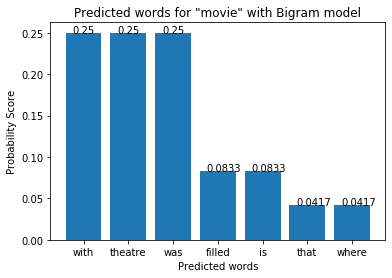

In [9]:
predict_next_word_chart('movie')

create a function that return a word that was predicted by the bigram model

In [10]:
def bigram_predict_next_word(firstword):
    if len(bigram_model[firstword])== 0:
        return None
    else:
        second_word = bigram_model[firstword]
        # get the top 10 words whose first word is 'first_word'
        top10words = Counter(second_word).most_common(10)
        predicted_words = list(zip(*top10words))[0] #unpack the list to words/prob
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
        return predicted_words[0] # return the top words, currently cannot solve the words with same probability

In [11]:
bigram_predict_next_word('movie')

'with'

In [12]:
# it returns None because there is no next word for the word,'hi'
bigram_predict_next_word('hi')

Create function to build a trigram model 

In [13]:
def build_trigram_model():
    trigram_model = defaultdict(default_dict)  # create a model mold
    for sentence in sentences_tokens: # in every sentence
        clean_sentence = [word.lower() for word in sentence if word.isalpha()] #get alpha only
        # Collect all bigrams counts for (w1, w2)
        for w1, w2, w3 in trigrams(clean_sentence):
            trigram_model[(w1, w2)][w3] += 1

        for w1_w2 in trigram_model:
            trigram_total_count = float(sum(trigram_model[w1_w2].values()))
            for w3 in trigram_model[w1_w2]:
                trigram_model[w1_w2][w3] /= trigram_total_count
    return trigram_model

create a function to predict next word based on trigram model and return a chart of predicted words

In [14]:
def predict_next_word_chart(two_words):
    first_word, second_word = two_words.split()
   # get the next word dict for the given 1st, 2nd word
    next_word = trigram_model[(first_word, second_word)]
    
    # Get top 10 words whose first two words are first_word and second_word
    top10words = Counter(next_word).most_common(10)
    
    if(len(top10words) > 0):
        predicted_words = list(zip(*top10words))[0]
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
    
        # calculate slope and intercept for the linear trend line
        #slope, intercept = np.polyfit(x_pos, probability_score, 1)
    
        plt.bar(x_pos, probability_score, align='center')
        for i in range(len(x_pos)):
            plt.text(x = i , y = probability_score[i], 
                 s = round(probability_score[i], 4))
        plt.xticks(x_pos, predicted_words)
        plt.ylabel('Probability Score')
        plt.xlabel('Predicted Words')
        plt.title(f'Predicted words for "{first_word} {second_word}" with Trigram model')
        plt.show()
    else:
        print("No history for the given sequence found...", first_word, second_word)

Build the trigram model

In [15]:
trigram_model = build_trigram_model()

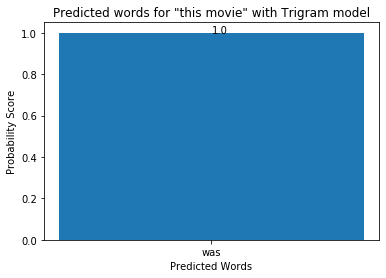

In [16]:
predict_next_word_chart('this movie')

In [17]:
# there is no next word for two preceding words,'comedy movie'
predict_next_word_chart('comedy movie')

No history for the given sequence found... comedy movie


create a function that return a word that was predicted by the trigram model;  
if there is no combination in trigram model, backoff to the bigram model;  
if there is no combination in bigram model, return none.  

In [18]:
def trigram_predict_next_word(two_words):
    first_word, second_word = two_words.split()
    if len(trigram_model[(first_word, second_word)])== 0:
        return bigram_predict_next_word(second_word)
    else:
        next_word = trigram_model[(first_word, second_word)]
        # get the top 10 words whose first word is 'first_word'
        top10words = Counter(next_word).most_common(10)
        predicted_words = list(zip(*top10words))[0] #unpack the list to words/prob
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
        return predicted_words[0] # return the top words, currently cannot solve the words with same probability

In [19]:
trigram_predict_next_word('comedy movie')

'with'

In [20]:
# return None because there is no next word for two preceding words,'movie hi'
trigram_predict_next_word("movie hi")

# Save and load model

The n-gram model has high computation cost. To increase the efficiency, the model should be save after it has been trained.

In [21]:
# pip install dill==0.2.7.1

save the model

In [22]:
import dill
with open('trigram_model.p', 'wb') as file:
    dill.dump(trigram_model, file, protocol=dill.HIGHEST_PROTOCOL)
    
with open('bigram_model.p', 'wb') as file:
    dill.dump(bigram_model, file, protocol=dill.HIGHEST_PROTOCOL)

Load the model

In [23]:
#with open('bigram_model.p', 'rb') as file:
#    bigram_model = dill.load(file)
#with open('bigram_model.p', 'rb') as file:
#    trigram_model = dill.load(file)
    